<a href="https://colab.research.google.com/github/Jonatala/SpaceshipTitanic/blob/main/SpaceshipTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Spaceship Titanic Project to predict which passengers are transported to an alternate dimension

In [1]:
# importing python modules, that gives extra functionalities to to import data, clean the data, format the data, build and evaluate the XGBoost model.

import pandas as pd # for loading and manipulating data and for One-Hot Encoding
import numpy as np # calculating the mean and standard deviation
import matplotlib.pyplot as plt # for visualisation
import seaborn as sns  # for visualisation
import plotly.express as px  # for visualisation

import xgboost as xgb # import XGBoost 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import  balanced_accuracy_score, roc_auc_score, make_scorer # for scoring 
from sklearn.model_selection import GridSearchCV # for cross validation
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # for drawing a confusion matrix
from sklearn.metrics import plot_roc_curve

%matplotlib inline

In [2]:
# importing training data and looking at the data
train = pd.read_csv('/content/train.csv')
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
# importing test data and looking at the data
test = pd.read_csv('/content/test.csv')
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [4]:
train['Name'].count()

8493

In [5]:
train.shape

(8693, 14)

In [6]:
# checking the type of data in each column

train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [7]:
#train['Name'].replace('', '_', regex=True, inplace=True)
#train.head()

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
train['Age'].unique()

array([39., 24., 58., 33., 16., 44., 26., 28., 35., 14., 34., 45., 32.,
       48., 31., 27.,  0.,  1., 49., 29., 10.,  7., 21., 62., 15., 43.,
       47.,  2., 20., 23., 30., 17., 55.,  4., 19., 56., nan, 25., 38.,
       36., 22., 18., 42., 37., 13.,  8., 40.,  3., 54.,  9.,  6., 64.,
       67., 61., 50., 41., 57., 11., 52., 51., 46., 60., 63., 59.,  5.,
       79., 68., 74., 12., 53., 65., 71., 75., 70., 76., 78., 73., 66.,
       69., 72., 77.])

In [10]:
# checking the correlation of the features
train.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


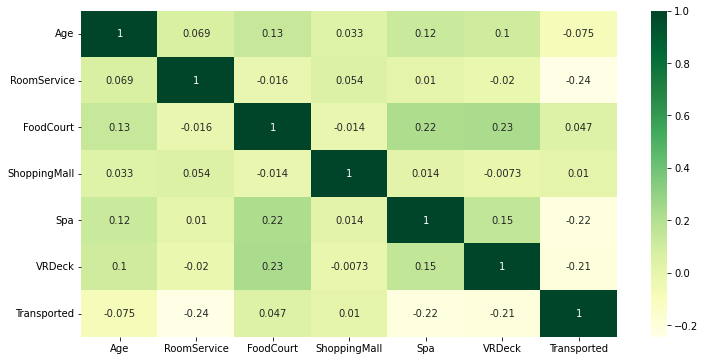

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(train.corr(), annot=True, cmap='YlGn')

In [12]:
# dropping columns not usefull

train.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)

In [13]:
#train['Age'] = pd.to_numeric(train['Age'])

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 687.8+ KB


In [15]:
len(train.loc[train['Age'] == ' '])

0

In [16]:
# Missing Values

train.isna().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

In [17]:
test.isna().sum().sort_values(ascending=False)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64

% of passengers that were transported: 50.36


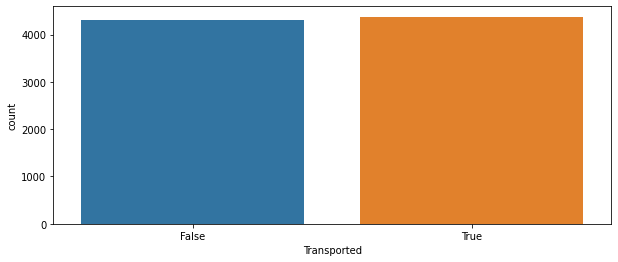

In [18]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Transported', data=train)
print(f"% of passengers that were transported: {train['Transported'].value_counts().iloc[0] / train.shape[0] * 100:.2f}")

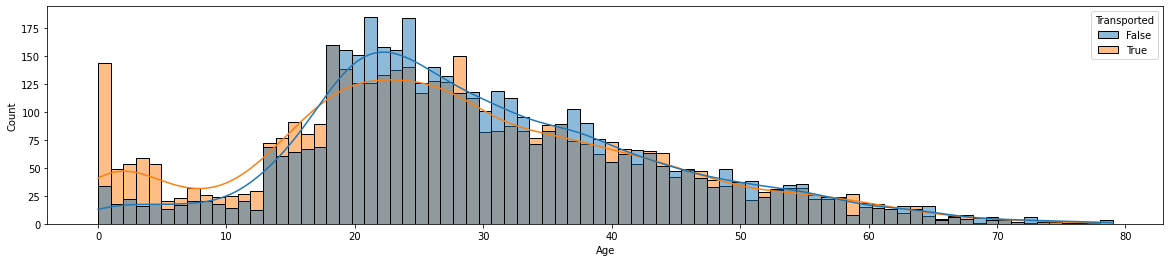

In [19]:
# draw histplot of Age column hue by Transported column
plt.figure(figsize=(20, 4))
sns.histplot(x='Age', hue='Transported', data=train, kde=True, bins=80)

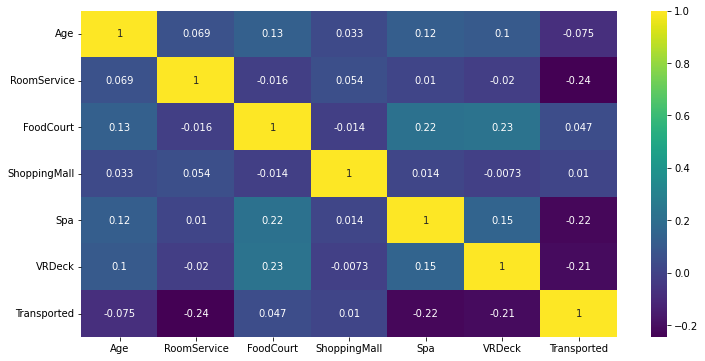

In [20]:
plt.figure(figsize=(12, 6))
sns.heatmap(train.corr(), annot=True, cmap='viridis')

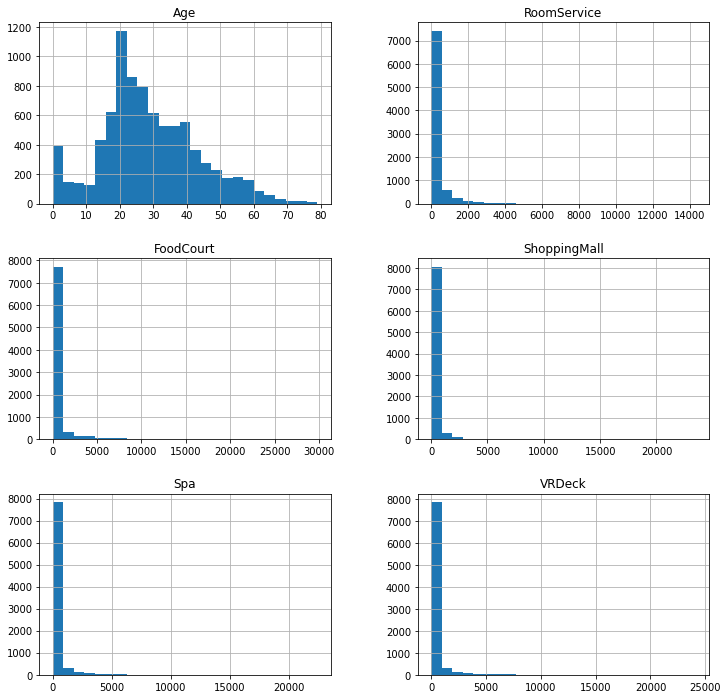

In [21]:
train.hist(bins = 25, figsize = (12, 12))
plt.show()

In [22]:
train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [23]:
train['CryoSleep'].unique()

array([False, True, nan], dtype=object)

In [24]:
#train['Cabin'].unique()

In [25]:
train['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [26]:
train['VIP'].unique()

array([False, True, nan], dtype=object)

In [27]:
len(train.loc[train['Age'] == ' '])

0

In [28]:
len(train.loc[train['HomePlanet'] == 'nan'])

0

In [29]:
train_encoded = pd.get_dummies(train, columns=['HomePlanet',
                                               'CryoSleep',
                                               'Destination',
                                               'VIP',
])
#'Cabin',
train_encoded.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,False,0,1,0,1,0,0,0,1,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,1,0,0,1,0,0,0,1,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0,1,0,0,0,1,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0,1,0,0,0,1,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,True,1,0,0,1,0,0,0,1,1,0


In [30]:
train_encoded.shape

(8693, 17)

In [31]:
#train['Cabin'].nunique()

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 687.8+ KB


In [33]:
train_no_null = train.dropna()

In [34]:
train_no_null.isna().sum().sort_values(ascending=False)

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [35]:
train_no_null.shape

(6923, 11)

In [36]:
train_no_null.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6923 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6923 non-null   object 
 1   CryoSleep     6923 non-null   object 
 2   Destination   6923 non-null   object 
 3   Age           6923 non-null   float64
 4   VIP           6923 non-null   object 
 5   RoomService   6923 non-null   float64
 6   FoodCourt     6923 non-null   float64
 7   ShoppingMall  6923 non-null   float64
 8   Spa           6923 non-null   float64
 9   VRDeck        6923 non-null   float64
 10  Transported   6923 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 601.7+ KB


In [37]:
# spliting the data into Dependent and independent variables

X = train.drop('Transported', axis=1).copy()

y = train['Transported'].copy()

In [38]:
X_encoded = pd.get_dummies(X, columns=['HomePlanet',
                                               'CryoSleep',
                                               'Destination',
                                               'VIP',
])

X_encoded.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,1,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,1,0,0,0,1,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,1,0,0,0,1,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,1,0,0,0,1,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,1,0,0,0,1,1,0


In [39]:
X_encoded.shape

(8693, 16)

In [40]:
sum(y)/len(y)

0.5036236051995858

In [41]:
# spliting the encoded dataset

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, test_size=0.3, stratify=y)

In [42]:
sum(y)

4378

In [43]:
sum(y_train)/len(y_train)

0.5036976170912079

In [44]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6085, 16) (2608, 16) (6085,) (2608,)


In [45]:
sum(y_test)/len(y_test)

0.5034509202453987

In [46]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42)
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.827579
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.840323
[2]	validation_0-aucpr:0.841465
[3]	validation_0-aucpr:0.844927
[4]	validation_0-aucpr:0.847617
[5]	validation_0-aucpr:0.854599
[6]	validation_0-aucpr:0.852968
[7]	validation_0-aucpr:0.857036
[8]	validation_0-aucpr:0.859607
[9]	validation_0-aucpr:0.858409
[10]	validation_0-aucpr:0.858625
[11]	validation_0-aucpr:0.859224
[12]	validation_0-aucpr:0.860902
[13]	validation_0-aucpr:0.861979
[14]	validation_0-aucpr:0.862301
[15]	validation_0-aucpr:0.862752
[16]	validation_0-aucpr:0.864406
[17]	validation_0-aucpr:0.865161
[18]	validation_0-aucpr:0.866455
[19]	validation_0-aucpr:0.867053
[20]	validation_0-aucpr:0.869028
[21]	validation_0-aucpr:0.869989
[22]	validation_0-aucpr:0.869853
[23]	validation_0-aucpr:0.871021
[24]	validation_0-aucpr:0.871445
[25]	validation_0-aucpr:0.871623
[26]	validation_0-aucpr:0.871625
[27]	validation_0-aucpr:0.872043
[28]	validation_0-au

XGBClassifier(seed=42)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


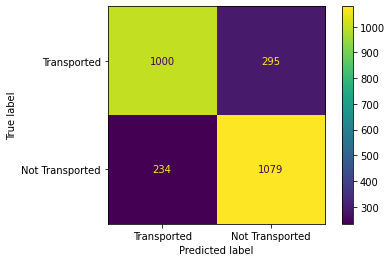

In [47]:
plot_confusion_matrix(clf_xgb,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=["Transported", "Not Transported"])

In [48]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0,0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0],
           
}

optimal_params = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
                                                          seed=42,
                                                          subsample=0.9,
                                                          colsample_bytree = 0.5),
                              param_grid=param_grid,
                              scoring='roc_auc',
                              verbose=0,
                              n_jobs=10,
                              cv = 3)

optimal_params.fit(X_train,
                   y_train,
                   early_stopping_rounds=10,
                   eval_metric='auc',
                   eval_set=[(X_test, y_test)],
                   verbose=False)
        
print(optimal_params.best_params_)

{'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 1.0}


In [49]:
clf_xgb = xgb.XGBClassifier(seed=42,
                            objective='binary:logistic',
                            gamma=1.0,
                            learning_rate=0.1,
                            max_depth=4,
                            reg_lambda=1.0,
                            subsample=0.9,
                            colsample_bytree=0.5)
clf_xgb.fit(X_train,
             y_train,
             verbose=True,
             early_stopping_rounds=10,
             eval_metric='aucpr',
             eval_set=[(X_test, y_test)])                             

[0]	validation_0-aucpr:0.816893
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.837378
[2]	validation_0-aucpr:0.858428
[3]	validation_0-aucpr:0.860603
[4]	validation_0-aucpr:0.85908
[5]	validation_0-aucpr:0.858091
[6]	validation_0-aucpr:0.860888
[7]	validation_0-aucpr:0.862504
[8]	validation_0-aucpr:0.863806
[9]	validation_0-aucpr:0.864657
[10]	validation_0-aucpr:0.868793
[11]	validation_0-aucpr:0.870893
[12]	validation_0-aucpr:0.871704
[13]	validation_0-aucpr:0.871271
[14]	validation_0-aucpr:0.872467
[15]	validation_0-aucpr:0.874779
[16]	validation_0-aucpr:0.876007
[17]	validation_0-aucpr:0.876584
[18]	validation_0-aucpr:0.877773
[19]	validation_0-aucpr:0.878257
[20]	validation_0-aucpr:0.878945
[21]	validation_0-aucpr:0.879126
[22]	validation_0-aucpr:0.879386
[23]	validation_0-aucpr:0.879705
[24]	validation_0-aucpr:0.88015
[25]	validation_0-aucpr:0.880628
[26]	validation_0-aucpr:0.880637
[27]	validation_0-aucpr:0.880863
[28]	validation_0-aucp

XGBClassifier(colsample_bytree=0.5, gamma=1.0, max_depth=4, reg_lambda=1.0,
              seed=42, subsample=0.9)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


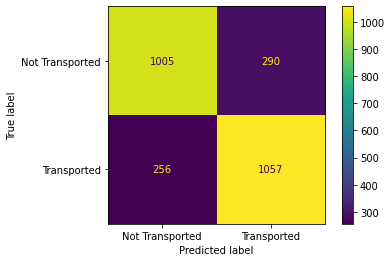

In [50]:
plot_confusion_matrix(clf_xgb,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=["Not Transported", "Transported"])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


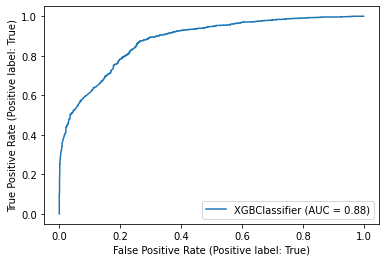

In [51]:
plot_roc_curve(clf_xgb, X_test, y_test)

In [52]:
sum(y_test)

1313

In [56]:
cross_val_score(clf_xgb, X_train, y_train, cv=3, scoring="accuracy")

array([0.78265155, 0.7933925 , 0.79043393])